# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
# allow graphs to render properly on jupyter notebook
%matplotlib inline 

# Getting the Data

In [2]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,6,1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)
VOO = web.DataReader('VOO', 'yahoo', start, end)
enphase = web.DataReader('ENPH', 'yahoo', start, end)
apple = web.DataReader('AAPL', 'yahoo', start, end)
meta = web.DataReader('META', 'yahoo', start, end)
devon = web.DataReader('DVN', 'yahoo', start, end)   

# Checking the data

In [3]:
# Using the VOO ETF index to benchmark the SP500 performance.
VOO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,345.089996,335.369995,345.019989,339.029999,5402600.0,333.248169
2021-01-05,342.390015,338.390015,338.399994,341.260010,3299700.0,335.440125
2021-01-06,346.500000,339.299988,339.790009,343.329987,4805000.0,337.474762
2021-01-07,349.200012,345.540009,345.739990,348.459991,3638900.0,342.517334
2021-01-08,350.619995,346.640015,349.880005,350.420013,3758500.0,344.443878


# Visualizing the data

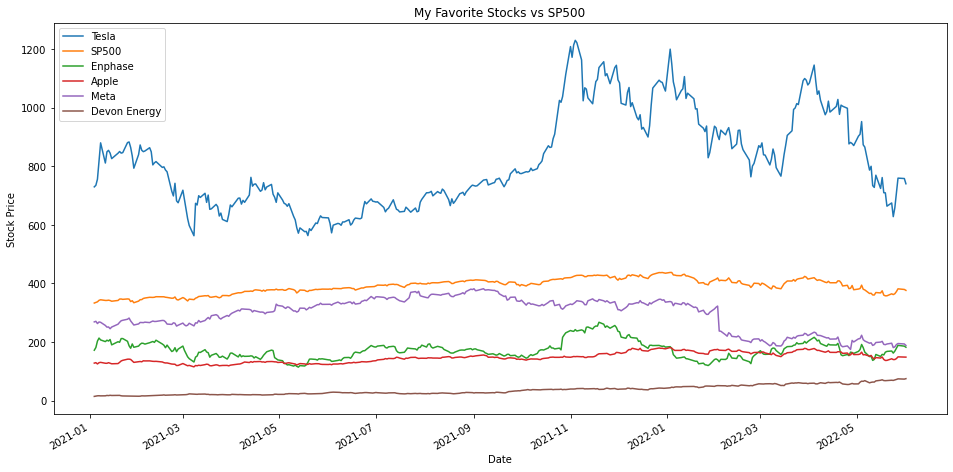

In [4]:
tesla['Adj Close'].plot(figsize=(16,8), title="My Favorite Stocks vs SP500", label='Tesla')
VOO['Adj Close'].plot(label='SP500')
enphase['Adj Close'].plot(label='Enphase')
apple['Adj Close'].plot(label='Apple')
meta['Adj Close'].plot(label='Meta')
devon['Adj Close'].plot(label='Devon Energy')
plt.legend()
plt.ylabel('Stock Price');

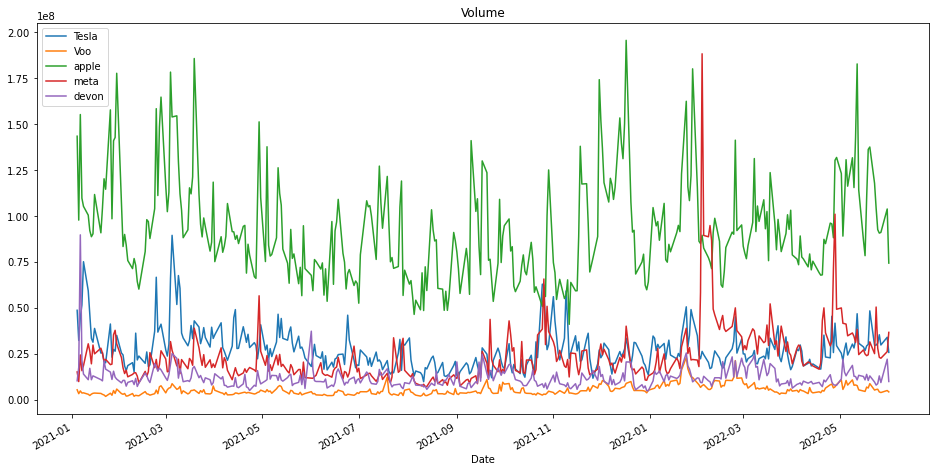

In [5]:
tesla['Volume'].plot(figsize=(16,8), title="Volume", label='Tesla')
VOO['Volume'].plot(label='Voo')
apple['Volume'].plot(label='apple')
meta['Volume'].plot(label='meta')
devon['Volume'].plot(label='devon')
plt.legend();



## The volume chart shows a huge spike in Meta's trading activity. We can find the date and find out what happened.



In [6]:
# We can isolate the time period with the highest volume.
meta['Volume'].idxmax()

Timestamp('2022-02-03 00:00:00')

### Feb 03 2022
### "Shares of Facebook owner Meta (FB.O) plummeted 26% on Thursday, the biggest single-day slide in market value for a U.S. company, after the social media giant issued a dismal forecast, blaming Apple Inc's (AAPL.O) privacy changes and increased competition."

#### "The huge drop, erasing over 200 billion from Meta's market capitalization and around 29 billion from Chief Executive Officer Mark Zuckerberg's net worth"
https://www.reuters.com/technology/meta-platforms-frankfurt-listed-shares-drop-tepid-forecast-2022-02-03/

#### "The social media company will shift its focus to short videos and continue to build the metaverse."

https://www.reuters.com/technology/meta-platforms-frankfurt-listed-shares-drop-tepid-forecast-2022-02-03/

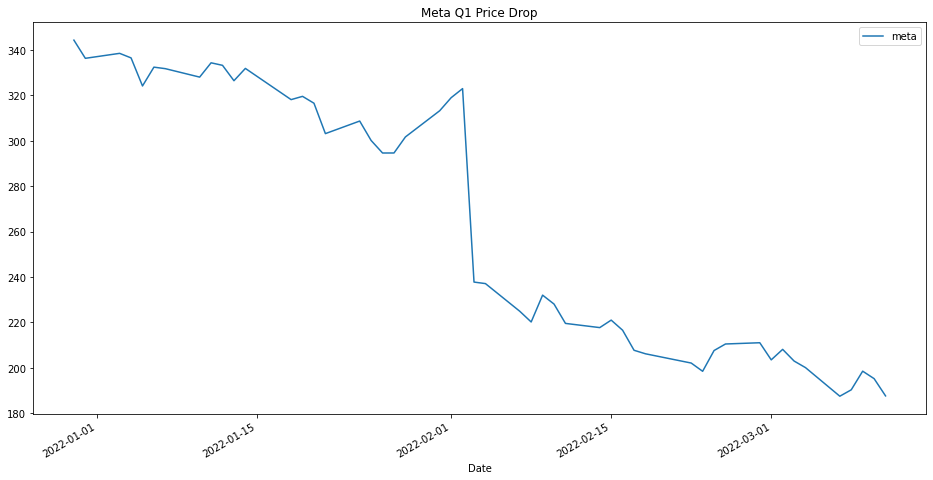

In [7]:
# We can use index slicing to zoom in for the first 3 months on 2022. 
meta['Adj Close'].iloc[250:300].plot(figsize=(16,8), label='meta', title='Meta Q1 Price Drop')
plt.legend();

## Moving Averages

In [8]:
# Adding the 50 and 100 day moving averages to the to the tables.
meta['Adj Close: 50 MA'] = meta['Adj Close'].rolling(window=50).mean()
meta['Adj Close: 100 MA'] = meta['Adj Close'].rolling(window=100).mean()
#meta.drop('Adj Close: 100 Day Mean', axis=1, inplace=True)

In [9]:
#Checking the data
meta.tail()

,High,Low,Open,Close,Volume,Adj Close,Adj Close: 50 MA,Adj Close: 100 MA
Date,,,,,,,,
2022-05-25,185.449997,179.320007,180.399994,183.830002,28030200,183.830002,207.029201,232.322801
2022-05-26,192.830002,182.259995,182.880005,191.630005,23056500,191.630005,206.789201,230.853701
2022-05-27,195.330002,189.800003,191.360001,195.130005,22562700,195.130005,206.535001,229.439701
2022-05-31,197.600006,192.009995,194.889999,193.639999,26131100,193.639999,206.078001,228.134401
2022-06-01,199.529999,185.000000,196.509995,188.639999,36623500,188.639999,205.621001,226.696201


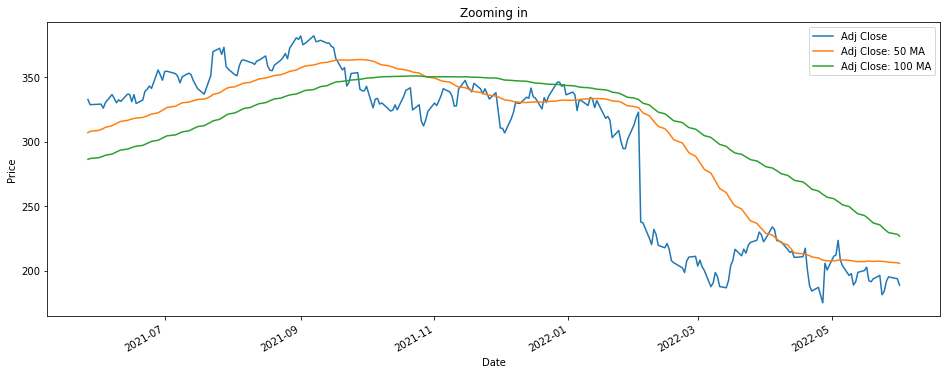

In [10]:
# Zooming in to see the how far Meta stock price fell below the moving averages
meta[['Adj Close','Adj Close: 50 MA', 'Adj Close: 100 MA']].iloc[100:400].plot(figsize=(16,6), title='Zooming in');
plt.ylabel('Price');

## Candlestick Chart

In [11]:
# install plotly library
import sys
!{sys.executable} -m pip install plotly
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

You should consider upgrading via the '/Users/sheriff/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [12]:
import plotly.graph_objects as go

# resetting series index to make "Date" a column. 
meta_reset = meta.loc['2021-01':'2022-06'].reset_index()


fig = go.Figure(data=[go.Candlestick(x=meta_reset['Date'],
                open=meta_reset['Open'],
                high=meta_reset['High'],
                low=meta_reset['Low'],
                close=meta_reset['Adj Close'])])

fig.update_layout(
    title='Facebook\'s worst day ever... losing $200 Billion of market share in one day!',
    yaxis_title='Meta Stock',
    shapes = [dict(
        x0='2022-01-24', x1='2022-01-24', y0=0, y1=1, xref='x', yref='paper',
        line_width=1)],
    annotations=[dict(
        x='2022-01-24', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='1/24 ~ Fed signals rate hike to fight rising inflation')]
)

fig.show()

In [13]:
tesla['returns'] = tesla['Adj Close'].pct_change(1)
VOO['returns'] = VOO['Adj Close'].pct_change(1)
meta['returns'] = meta['Adj Close'].pct_change(1)
enphase['returns'] = enphase['Adj Close'].pct_change(1)
apple['returns'] = apple['Adj Close'].pct_change(1)
devon['returns'] = devon['Adj Close'].pct_change(1)

In [14]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2021-01-04,744.489990,717.190002,719.460022,729.770020,48638200,729.770020,NaN
2021-01-05,740.840027,719.200012,723.659973,735.109985,32245200,735.109985,0.007317
2021-01-06,774.000000,749.099976,758.489990,755.979980,44700000,755.979980,0.028390
2021-01-07,816.989990,775.200012,777.630005,816.039978,51498900,816.039978,0.079447
2021-01-08,884.489990,838.390015,856.000000,880.020020,75055500,880.020020,0.078403


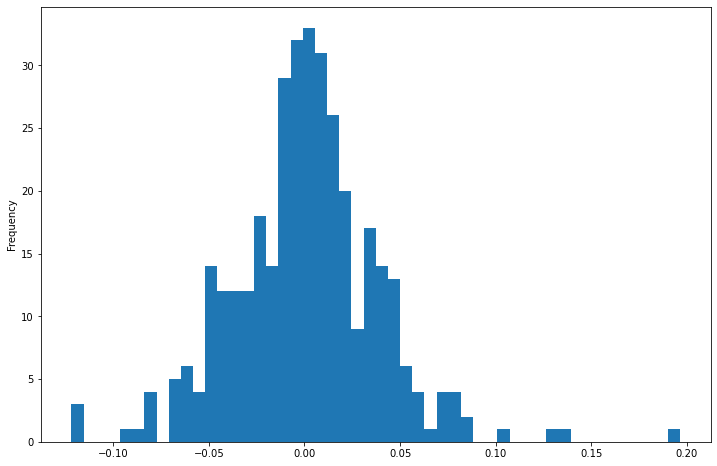

In [15]:
tesla['returns'].plot.hist(bins=50, figsize=(12,8));

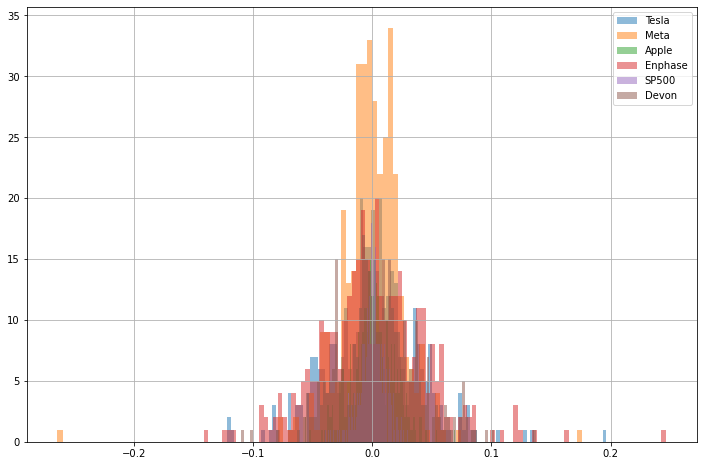

In [16]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(12,8),alpha=0.5)
meta['returns'].hist(bins=100,label='Meta',alpha=0.5)
apple['returns'].hist(bins=100,label='Apple',alpha=0.5)
enphase['returns'].hist(bins=100,label='Enphase',figsize=(12,8),alpha=0.5)
VOO['returns'].hist(bins=100,label='SP500',alpha=0.5)
devon['returns'].hist(bins=100,label='Devon',alpha=0.5)
plt.legend();

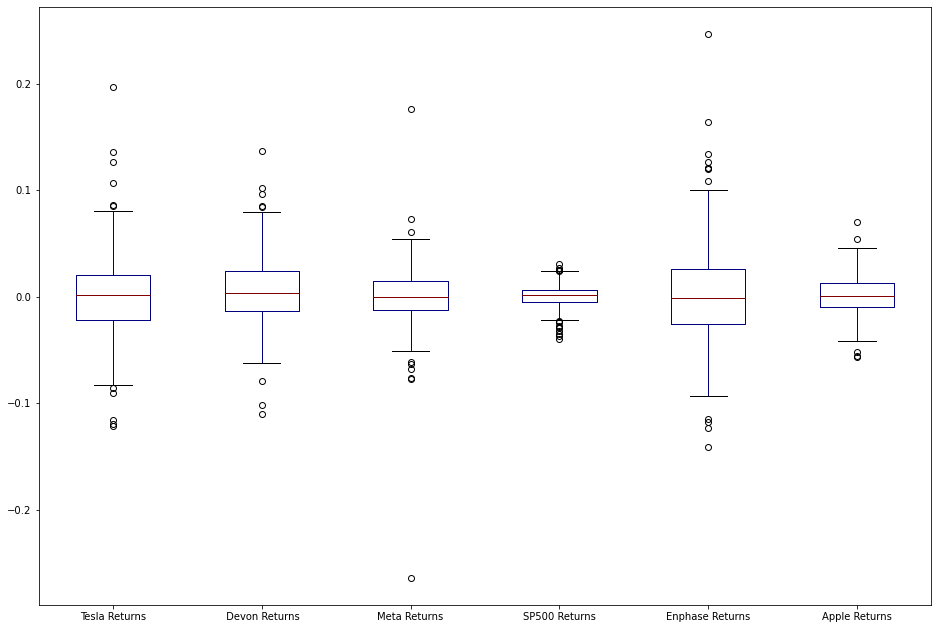

In [17]:
box_df = pd.concat([tesla['returns'],devon['returns'],meta['returns'],VOO['returns'],enphase['returns'],apple['returns']],axis=1)
box_df.columns = ['Tesla Returns',' Devon Returns','Meta Returns', 'SP500 Returns','Enphase Returns','Apple Returns']
box_df.plot(kind='box',figsize=(16,11),colormap='jet');

In [18]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
VOO['Cumulative Return'] = (1 + VOO['returns']).cumprod()
meta['Cumulative Return'] = (1 + meta['returns']).cumprod()
enphase['Cumulative Return'] = (1 + enphase['returns']).cumprod()
devon['Cumulative Return'] = (1 + devon['returns']).cumprod()
apple['Cumulative Return'] = (1 + apple['returns']).cumprod()

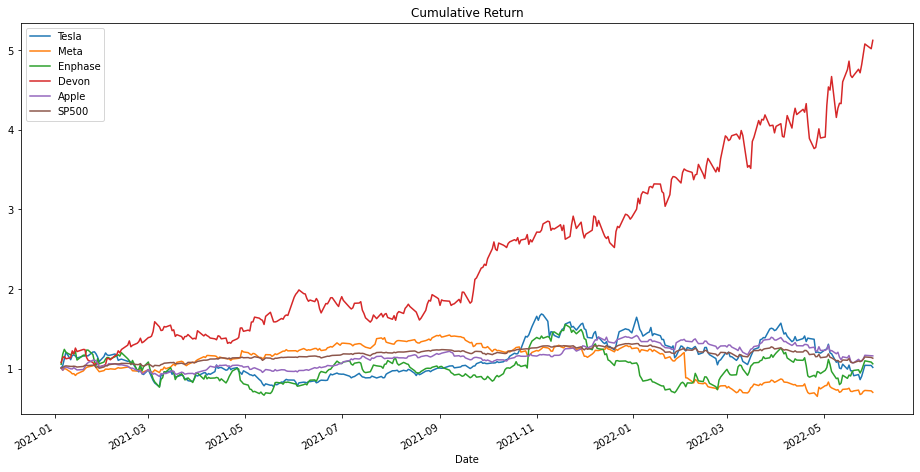

In [19]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
meta['Cumulative Return'].plot(label='Meta')
enphase['Cumulative Return'].plot(label='Enphase')
devon['Cumulative Return'].plot(label='Devon')
apple['Cumulative Return'].plot(label='Apple')
VOO['Cumulative Return'].plot(label='SP500')
plt.legend();

In [20]:
meta_dollars = round((meta.loc['2022-06-01']['Cumulative Return']),2) * 10000
devon_dollars = round((devon.loc['2022-06-01']['Cumulative Return']),2) * 10000
VOO_dollars = round((VOO.loc['2022-06-01']['Cumulative Return']),2) * 10000
enphase_dollars = round((enphase.loc['2022-06-01']['Cumulative Return']),2) * 10000
apple_dollars = round((apple.loc['2022-06-01']['Cumulative Return']),2) * 10000
tesla_dollars = round((tesla.loc['2022-06-01']['Cumulative Return']),2) * 10000

In [21]:
enphase_dollars


10600.0

In [22]:
x1 = ['Meta', 'Devon Energy', 'Enphase', 'Apple', 'Tesla', 'SP500']
y1 = [meta_dollars,devon_dollars,enphase_dollars, apple_dollars, tesla_dollars, VOO_dollars ] 

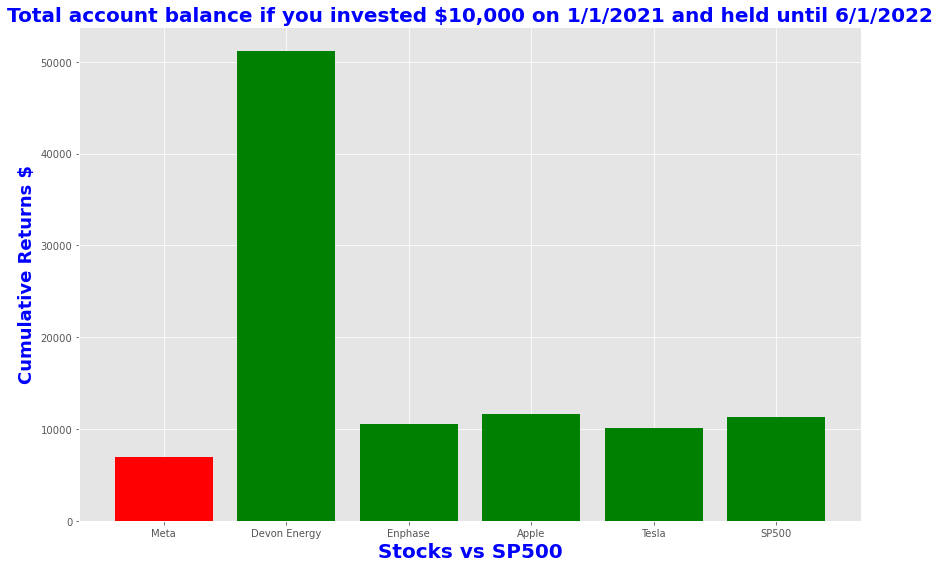

In [23]:

plt.style.use('ggplot')
colors = ['red', 'green', 'green', 'green', 'green', 'green']
#colors = [color == 'green' for y in y1 if y >= 10000 else color == 'red']
#colors = [y for y in y1 if y >= 10000: colors = 'green' else: colors = 'red']
for y in y1:
    if y >= 10000:
        colors == 'green'
    else:
        colors == 'red'
        
fig = plt.figure(figsize=(12,8))
plt.bar(x1, y1, color=colors)


plt.ylabel("Cumulative Returns $",fontweight='bold', color = 'blue', fontsize='18')
plt.title("Total account balance if you invested $10,000 on 1/1/2021 and held until 6/1/2022", fontweight='bold', color = 'blue', fontsize='20')

plt.xlabel('Stocks vs SP500', fontweight='bold', color = 'blue', fontsize='20')
plt.tight_layout()

plt.show()